## Import Necessary Packages

In [3]:
import os
import torch
import pickle
import warnings
import numpy as np
import xarray as xr
import pandas as pd
import proplot as pplt
import scipy.stats as stats
pplt.rc['figure.dpi'] = 100
warnings.filterwarnings('ignore')

## Plot Regular vs. Log-Normalized $B_L$ vs. Precipitation

In [9]:
def load(varname):
    data = xr.open_dataset('/global/cfs/cdirs/m4334/sferrett/monsoon-pod/data/processed/LR_ERA5_IMERG_pr_bl_terms.nc')
    return data[varname].load()

def log_normalize(data,c=1.0):
    normdata = np.log(data+c)
    return normdata

In [10]:
bl  = load('bl')
pr  = load('pr')
prlog = log_normalize(pr,c=1.0)

In [11]:
x    = bl.values.flatten()
y    = pr.values.flatten()
ylog = prlog.values.flatten()
bins = 100

### Regular

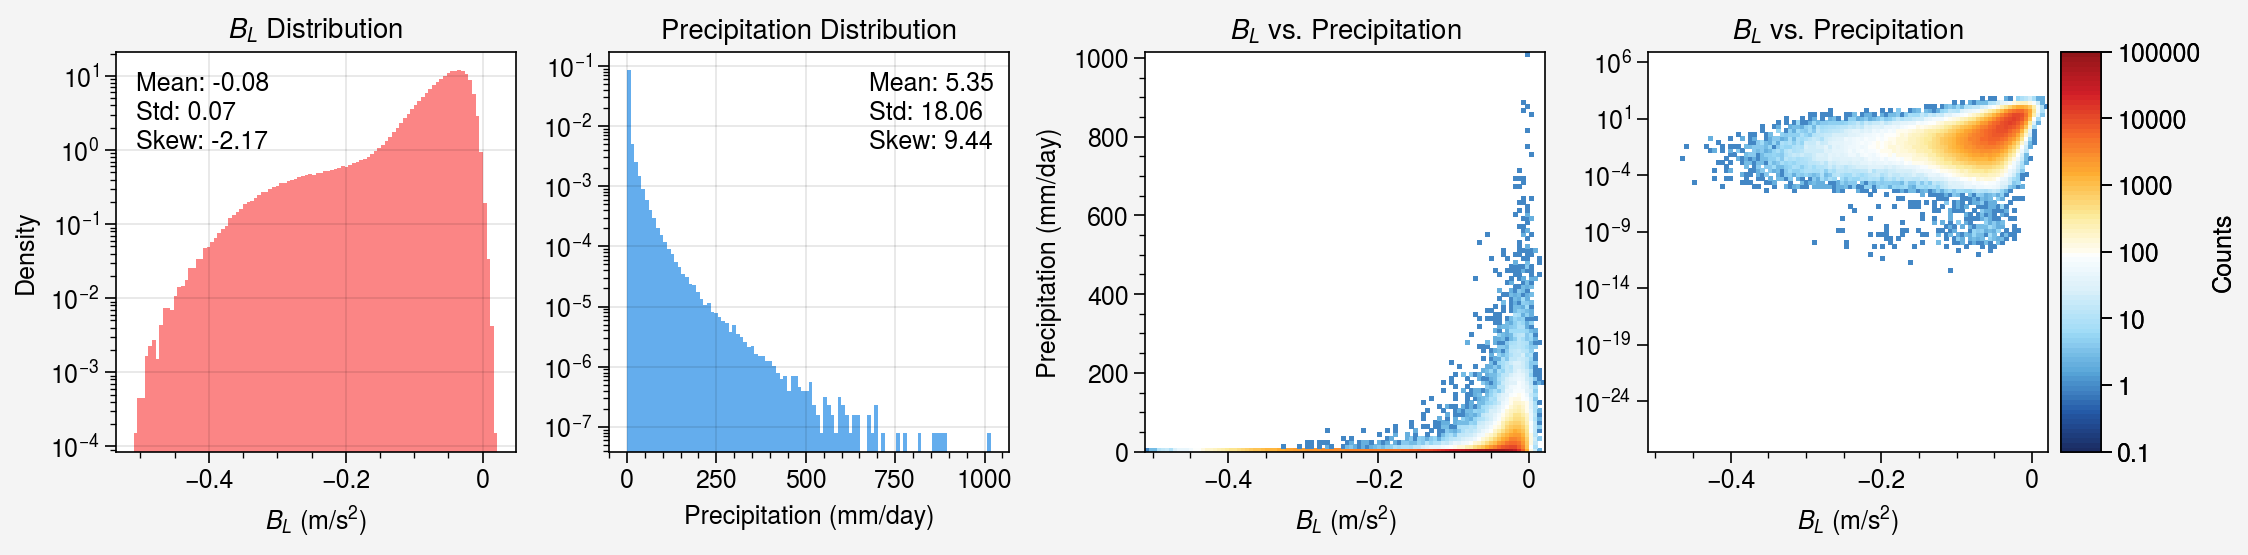

In [12]:
fig,axs = pplt.subplots(nrows=1,ncols=4,refwidth=2,share=False)
axs[0].format(title='$\mathit{B_L}$ Distribution',xlabel='$\mathit{B_L}$ (m/s$^2$)',ylabel='Density',yscale='log',yformatter='log')
axs[1].format(title='Precipitation Distribution',xlabel='Precipitation (mm/day)',yscale='log',yformatter='log')
axs[2].format(title='$\mathit{B_L}$ vs. Precipitation',xlabel='$\mathit{B_L}$ (m/s$^2$)',ylabel='Precipitation (mm/day)')
axs[3].format(title='$\mathit{B_L}$ vs. Precipitation',xlabel='$\mathit{B_L}$ (m/s$^2$)',yscale='log',yformatter='log')
axs[0].hist(x,bins=bins,density=True,color='red6',alpha=0.7)
axs[1].hist(y,bins=bins,density=True,color='blue6',alpha=0.7)
statsx = f'Mean: {np.mean(x):.2f}\nStd: {np.std(x):.2f}\nSkew: {stats.skew(x):.2f}'
statsy = f'Mean: {np.mean(y):.2f}\nStd: {np.std(y):.2f}\nSkew: {stats.skew(y):.2f}'
axs[0].text(0.05,0.95,statsx,transform=axs[0].transAxes,va='top')
axs[1].text(0.65,0.95,statsy,transform=axs[1].transAxes,va='top')
hist,xedges,yedges = np.histogram2d(x,y,bins=(bins,bins))
hist = np.ma.masked_where(hist==0,hist)
mesh = axs[2].pcolormesh(xedges,yedges,hist.T,cmap='ColdHot',norm='log',levels=100)
xedges = np.linspace(np.min(x),np.max(x),bins+1)
yedges = np.logspace(np.log(np.min(y[y>0])),np.log(np.max(y)),bins+1)
hist,_,_ = np.histogram2d(x,y,bins=(xedges,yedges))
hist = np.ma.masked_where(hist==0,hist)
meshlog = axs[3].pcolormesh(xedges,yedges,hist.T,cmap='ColdHot',norm='log',levels=100)
axs[3].colorbar(meshlog,label='Counts',ticks=[0.1,1,10,100,1000,10000,100000])
pplt.show()

### Log-Normalized

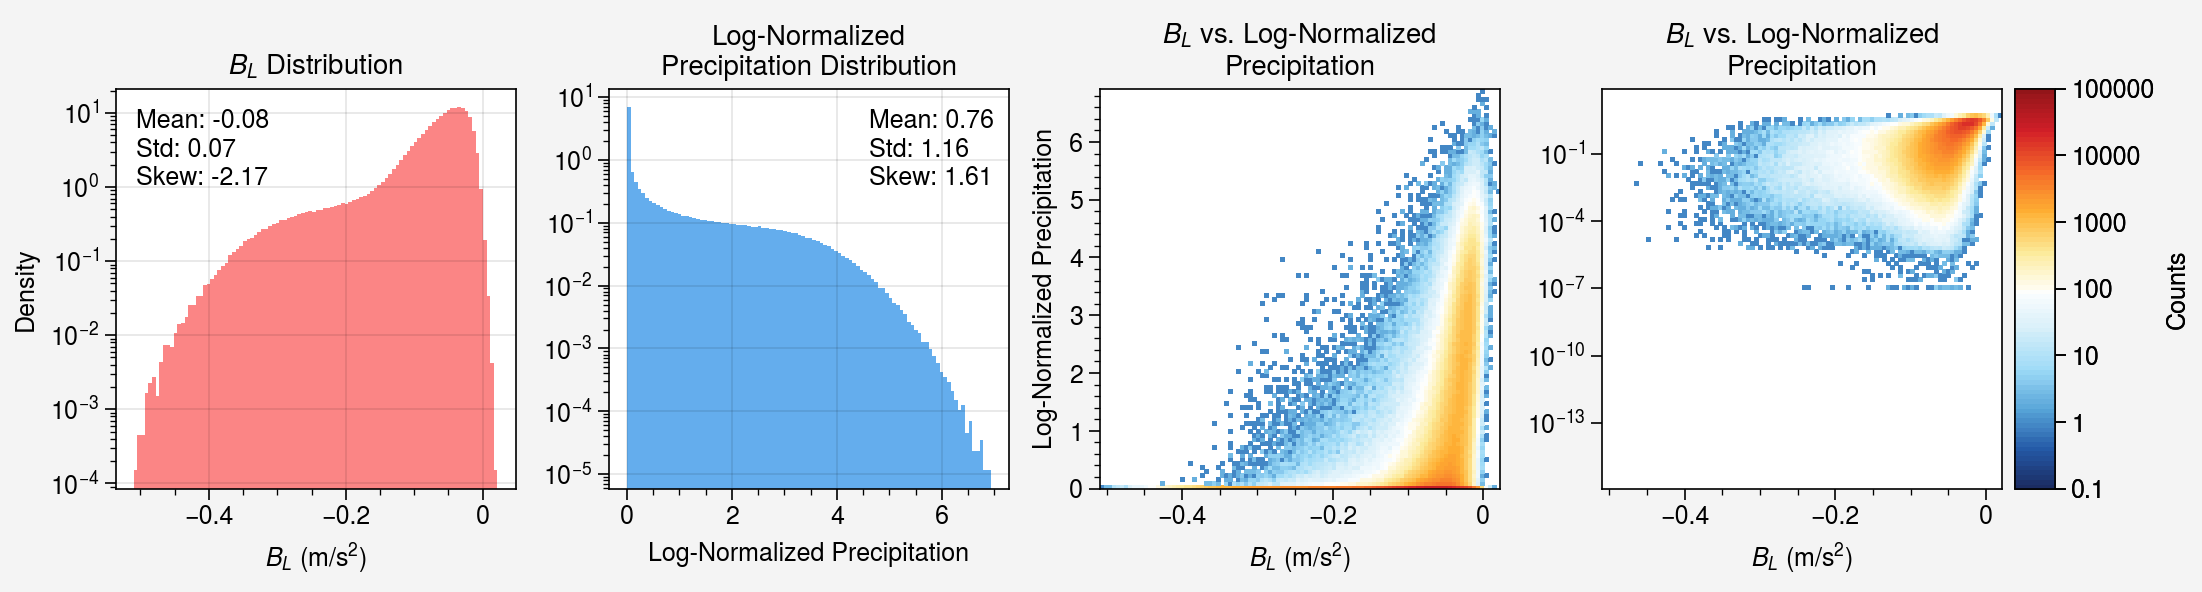

In [13]:
fig,axs = pplt.subplots(nrows=1,ncols=4,refwidth=2,share=False)
axs[0].format(title='$\mathit{B_L}$ Distribution',xlabel='$\mathit{B_L}$ (m/s$^2$)',ylabel='Density',yscale='log',yformatter='log')
axs[1].format(title='Log-Normalized\nPrecipitation Distribution',xlabel='Log-Normalized Precipitation',yscale='log',yformatter='log')
axs[2].format(title='$\mathit{B_L}$ vs. Log-Normalized\nPrecipitation',xlabel='$\mathit{B_L}$ (m/s$^2$)',ylabel='Log-Normalized Precipitation')
axs[3].format(title='$\mathit{B_L}$ vs. Log-Normalized\nPrecipitation',xlabel='$\mathit{B_L}$ (m/s$^2$)',yscale='log',yformatter='log')
axs[0].hist(x,bins=bins,density=True,color='red6',alpha=0.7)
axs[1].hist(ylog,bins=bins,density=True,color='blue6',alpha=0.7)
statsx = f'Mean: {np.mean(x):.2f}\nStd: {np.std(x):.2f}\nSkew: {stats.skew(x):.2f}'
statsy = f'Mean: {np.mean(ylog):.2f}\nStd: {np.std(ylog):.2f}\nSkew: {stats.skew(ylog):.2f}'
axs[0].text(0.05,0.95,statsx,transform=axs[0].transAxes,va='top')
axs[1].text(0.65,0.95,statsy,transform=axs[1].transAxes,va='top')
hist,xedges,yedges = np.histogram2d(x,ylog,bins=(bins,bins))
hist = np.ma.masked_where(hist==0,hist)
mesh = axs[2].pcolormesh(xedges,yedges,hist.T,cmap='ColdHot',norm='log',levels=100)
xedges = np.linspace(np.min(x),np.max(x),bins+1)
yedges = np.logspace(np.log(np.min(ylog[ylog>0])),np.log(np.max(ylog)),bins+1)
hist,_,_ = np.histogram2d(x,ylog,bins=(xedges,yedges))
hist = np.ma.masked_where(hist==0,hist)
meshlog = axs[3].pcolormesh(xedges,yedges,hist.T,cmap='ColdHot',norm='log',levels=100)
axs[3].colorbar(meshlog,label='Counts',ticks=[0.1,1,10,100,1000,10000,100000])
pplt.show()

## Plot Analytical Baselines

In [14]:
with open(f'/global/cfs/cdirs/m4334/sferrett/monsoon-sr/data//results/baseline_results.pkl','rb') as file:
    baseresults = pickle.load(file)

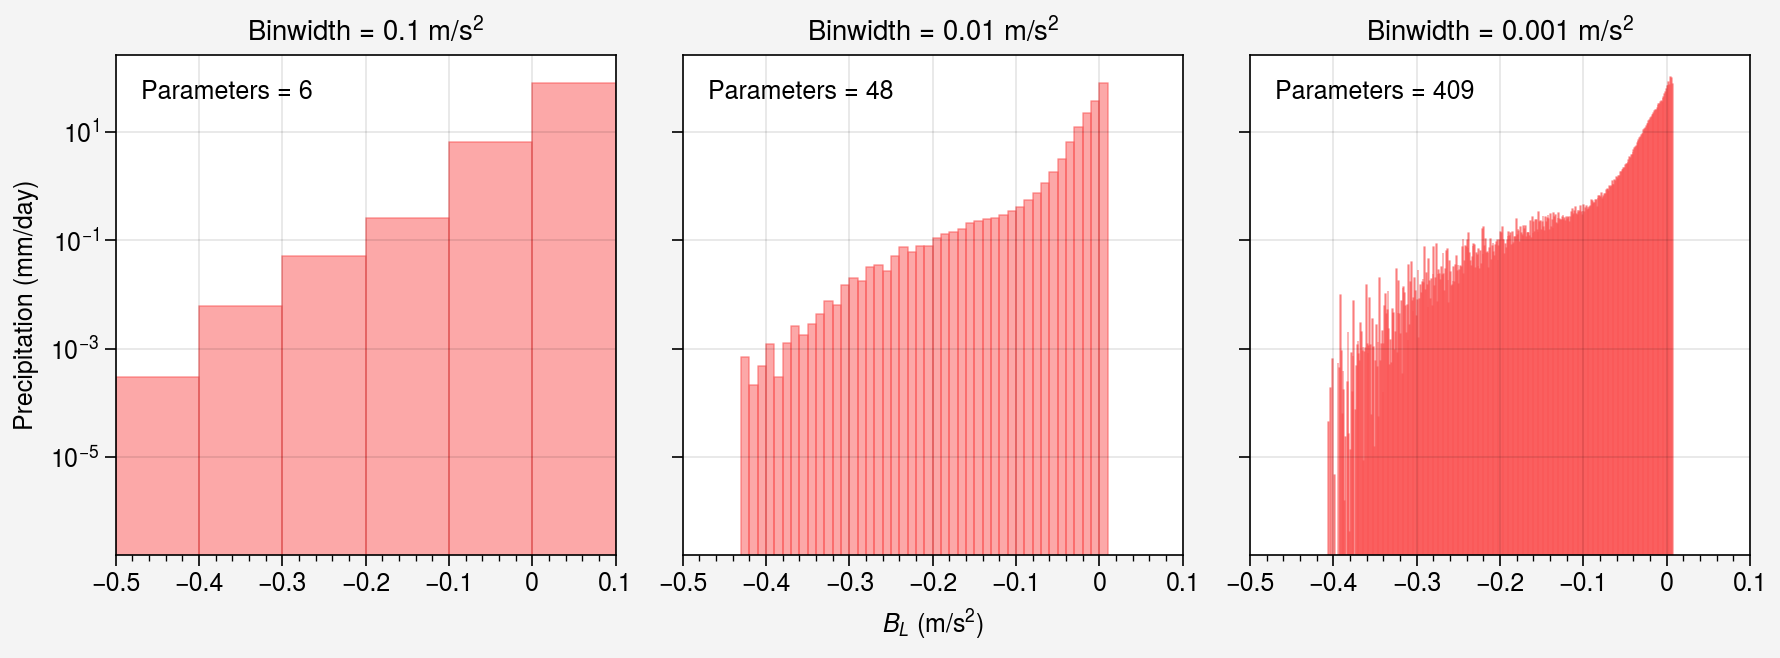

In [16]:
fig,axs = pplt.subplots(nrows=1,ncols=3,share=True)
axs.format(xlabel='$\mathit{B_L}$ (m/s$^2$)',xlim=(-0.5,0.1),xticks=0.1,ylabel='Precipitation (mm/day)',yscale='log',yformatter='log')
for i,(modelname,results) in enumerate(baseresults.items()):
    title    = results['description']
    bins     = results['bincenters']
    means    = results['binmeans']
    binwidth = results['binwidth']
    nparams  = results['nparams']
    axs[i].format(title=title)
    for bincenter,meanvalue in zip(bins,means):
        if not np.isnan(meanvalue):
            leftedge  = bincenter-binwidth/2
            rightedge = bincenter+binwidth/2
            axs[i].fill_between([leftedge,rightedge],[0,0],[meanvalue,meanvalue],color='red6',edgecolor='red6',alpha=0.5)
    axs[i].text(0.05,0.95,f'Parameters = {nparams}',transform=axs[i].transAxes,va='top')
pplt.show()